In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt
import nltk
from nltk.util import ngrams
from datetime import datetime
nltk.download("all")
# nltk.download('punkt')
# nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')
stopwords.append('r')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /home/cmatheus/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /home/cmatheus/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /home/cmatheus/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /home/cmatheus/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /home/cmatheus/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading pa

In [2]:
plt.rcParams["figure.figsize"] = (10, 8)

In [3]:
data = pd.read_csv("../data/interim/data/data.csv")
data.head()

,text,datetime,category,label,site
0,Kátia Abreu diz que vai colocar sua expulsão e...,2017-11-30,politica,fake,https://ceticismopolitico.com/2017/11/30/katia...
1,"Dr. Ray peita Bolsonaro, chama-o de conservad...",2017-11-24,politica,fake,https://ceticismopolitico.com/2017/11/24/dr-ra...
2,Reinaldo Azevedo desmascarado pela Polícia Fed...,2017-05-23,politica,fake,https://afolhabrasil.com.br/politica/reinaldo-...
3,Relatório assustador do BNDES mostra dinheiro ...,24/07/2017,politica,fake,https://www.diariodobrasil.org/relatorio-assus...
4,"Radialista americano fala sobre o PT: ""Eles ve...",25/07/2017,politica,fake,https://www.diariodobrasil.org/radialista-amer...


## Processamento dos dados

1. Tratamento das datas

In [4]:
data["date"] = data["datetime"].apply(lambda x :x.replace(" de ", "/"))

In [5]:
data["date"] = data["date"].apply(lambda x :x.replace("-", "/"))

In [6]:
mes = {
    "janeiro": '01',
    "fevereiro": '02',
    "março": '03',
    "abril": '04',
    "maio": '05',
    "junho": '06',
    "julho": '07',
    "agosto": '08',
    "setembro": '09',
    "outubro": '10',
    "novembro": '11',
    "dezembro": '12',
}

In [7]:
datas = []
for i in data.date:
    d = i.split('/')
    if d[1] in mes:
        d[1] = mes[d[1]]
    datas.append('/'.join(d))
len(datas)

7200

In [8]:
data["date"] = datas

In [9]:
data.date

0             2017/11/30
1             2017/11/24
2             2017/05/23
3             24/07/2017
4             25/07/2017
              ...       
7195          22/11/2016
7196    09/02/2018 08h25
7197    31/12/2016 05h00
7198    15/09/2017 20h46
7199    08/01/2018 11h58
Name: date, Length: 7200, dtype: object

In [10]:
data.date.mode()

0    25/01/2018
Name: date, dtype: object

In [11]:
certas = []

for k,v in enumerate(data.date):
    try:
        certas.append(pd.to_datetime(pd.Series(v),infer_datetime_format=True).to_string().split()[1])
    except:
        #data.date[k]="25/01/2018"
        aux = data.date[k].replace("0201","2018")# replace ano 
        certas.append(pd.to_datetime(pd.Series(aux),infer_datetime_format=True).to_string().split()[1])
        


In [12]:
certas[128]

'2017-06-16'

In [13]:
# data['date'] = ['/'.join(i.split('-')[::-1]) for i in certas]
# data.date

In [14]:
data["date_new"] = certas
data["date_new"] = pd.to_datetime(data.date_new, infer_datetime_format=True)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7200 entries, 0 to 7199
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   text      7200 non-null   object        
 1   datetime  7200 non-null   object        
 2   category  7200 non-null   object        
 3   label     7200 non-null   object        
 4   site      7200 non-null   object        
 5   date      7200 non-null   object        
 6   date_new  7200 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 393.9+ KB


In [16]:
data['date_new']

0      2017-11-30
1      2017-11-24
2      2017-05-23
3      2017-07-24
4      2017-07-25
          ...    
7195   2016-11-22
7196   2018-09-02
7197   2016-12-31
7198   2017-09-15
7199   2018-08-01
Name: date_new, Length: 7200, dtype: datetime64[ns]

2. Tratamento dos textos

In [17]:
def remove_stopword(old):
    retorno= ""
    palavras = nltk.word_tokenize(old)
    nova = [palavra for palavra in palavras if palavra not in stopwords]
    retorno= ' '.join(nova)
    return retorno

In [18]:
data["clean_text"] = data["text"].apply(lambda x : x.lower())

In [19]:
data["clean_text"] = data["clean_text"].apply(lambda x : re.sub('[^\w\s]', '', x))

In [20]:
data["clean_text"] = data["clean_text"].apply(lambda x: remove_stopword(x))

In [21]:
data.to_csv(path_or_buf="../data/external/data_prep1.csv", index=False,encoding="utf-8")

## Análise Exploratória

In [22]:
fake = data[data["label"]=="fake"]
true = data[data["label"]=="true"]

In [23]:
# quantidade de true news por mês
group_date_true = true.groupby('date_new')['label'].count().reset_index()
df_true_label = group_date_true.resample('M', on='date_new').mean().reset_index().rename(columns = {'date_new':'date', 'label':'count_label'})
df_true_label["mes"] = df_true_label['date'].dt.month
df_true_label

,date,count_label,mes
0,2009-01-31,1.000000,1
1,2009-02-28,NaN,2
2,2009-03-31,NaN,3
3,2009-04-30,NaN,4
4,2009-05-31,NaN,5
...,...,...,...
115,2018-08-31,21.666667,8
116,2018-09-30,13.666667,9
117,2018-10-31,11.000000,10
118,2018-11-30,7.666667,11


In [24]:
# quantidade de fake news por mês
group_date_fake = fake.groupby('date_new')['label'].count().reset_index()
df_fake_label = group_date_fake.resample('M', on='date_new').mean().reset_index().rename(columns = {'date_new':'date', 'label':'count_label'})
df_fake_label["mes"] = df_fake_label['date'].dt.month
df_fake_label

,date,count_label,mes
0,2012-09-30,1.0,9
1,2012-10-31,NaN,10
2,2012-11-30,NaN,11
3,2012-12-31,NaN,12
4,2013-01-31,NaN,1
...,...,...,...
71,2018-08-31,15.0,8
72,2018-09-30,6.0,9
73,2018-10-31,NaN,10
74,2018-11-30,4.0,11


In [25]:
sns.set_style("whitegrid")

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


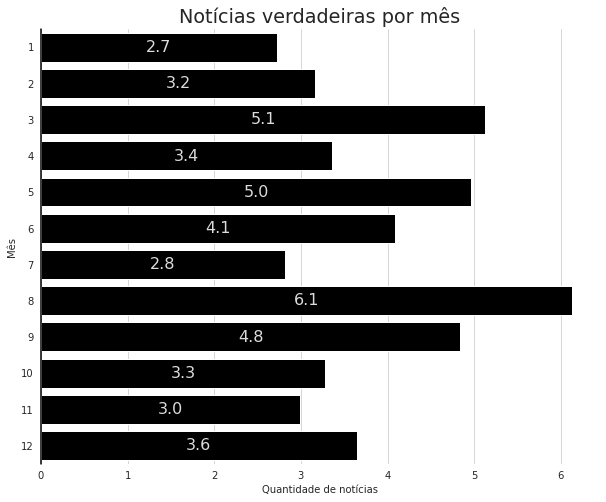

In [26]:
plt.subplots(figsize=(10, 8))
mlp.rc('font', family = 'Arial', size=16)
ax = sns.barplot(x="count_label", y="mes", data=df_true_label.groupby('mes').mean().reset_index(),
                hue_order="mes", orient='h', color='black')
ax.bar_label(
    ax.containers[0],
    fmt='%.1f',
    label_type='center',
    color='gainsboro'
)
ax.set(frame_on=False)
ax.axvline(0, color="k", clip_on=False)
plt.title("Notícias verdadeiras por mês")
plt.ylabel('Mês')
plt.xlabel('Quantidade de notícias')
plt.show();

Gráfico 1

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


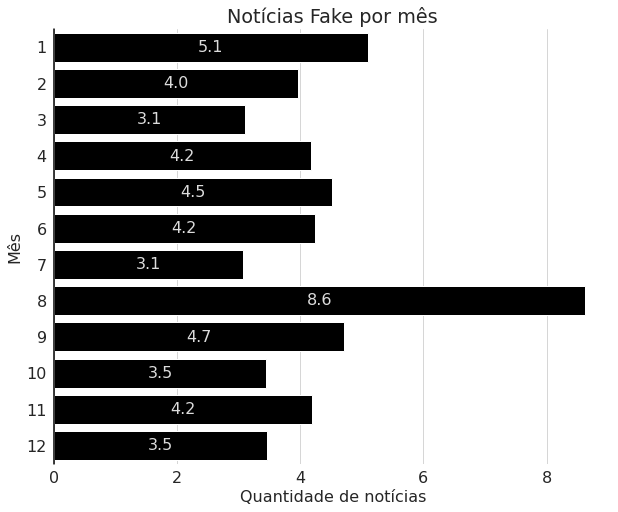

In [27]:
plt.subplots(figsize=(10, 8))
mlp.rc('font', family = 'Arial', size=16)
ax = sns.barplot(x="count_label", y="mes", data=df_fake_label.groupby('mes').mean().reset_index(),
                hue_order="mes", orient='h', color='black')
ax.set(frame_on=False)
ax.bar_label(
    ax.containers[0],
    fmt='%.1f',
    label_type='center',
    color='gainsboro'
)
ax.axvline(0, color="k", clip_on=False)
plt.title("Notícias Fake por mês")
plt.ylabel('Mês')
plt.xlabel('Quantidade de notícias')
plt.show();

Gráfico 2

Nesses gráficos, temos a quantidade de true (gráfico 1) e fake (gráfico 2) somados por meses no intervalo de todos os anos.

In [28]:
group_date_true_y = true.groupby('date_new')['label'].count()
df_true_label_y = group_date_true_y.resample('Y').mean().reset_index().rename(columns = {'date_new':'date', 'label':'count_label'})
df_true_label_y['ano'] = df_true_label_y['date'].dt.year
df_true_label_y

,date,count_label,ano
0,2009-12-31,1.000000,2009
1,2010-12-31,1.000000,2010
2,2011-12-31,1.000000,2011
3,2012-12-31,1.000000,2012
4,2013-12-31,1.000000,2013
5,2014-12-31,1.111111,2014
6,2015-12-31,1.052632,2015
7,2016-12-31,1.705521,2016
8,2017-12-31,6.078035,2017
9,2018-12-31,12.677778,2018


In [29]:
group_date_fake_y = fake.groupby('date_new')['label'].count()
df_fake_label_y = group_date_fake_y.resample('Y').mean().reset_index().rename(columns = {'date_new':'date', 'label':'count_label'})
df_fake_label_y['ano'] = df_fake_label_y['date'].dt.year
df_fake_label_y

,date,count_label,ano
0,2012-12-31,1.000000,2012
1,2013-12-31,NaN,2013
2,2014-12-31,NaN,2014
3,2015-12-31,3.790323,2015
4,2016-12-31,4.734328,2016
5,2017-12-31,4.555241,2017
6,2018-12-31,5.312500,2018


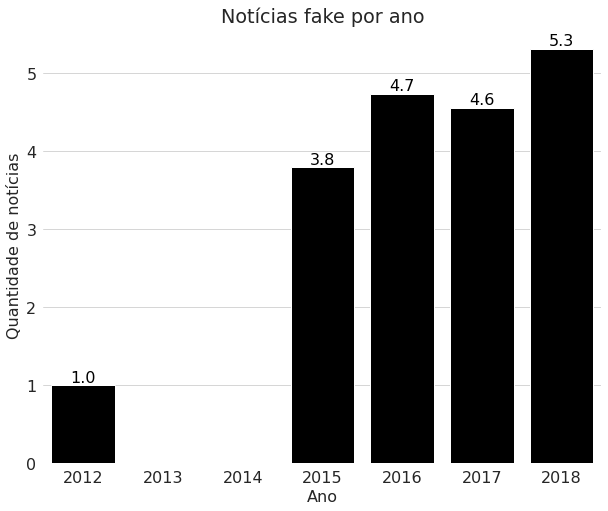

In [30]:
plt.subplots(figsize=(10, 8))
mlp.rc('font', family = 'Arial', size=16)
ax = sns.barplot(x="ano", y="count_label", data=df_fake_label_y,
                hue_order="mes", color='black')
ax.set(frame_on=False)
ax.bar_label(
    ax.containers[0],
    fmt='%.1f',
    label_type='edge',
    color='black'
)
plt.title("Notícias fake por ano")
plt.ylabel('Quantidade de notícias')
plt.xlabel('Ano')
plt.show()

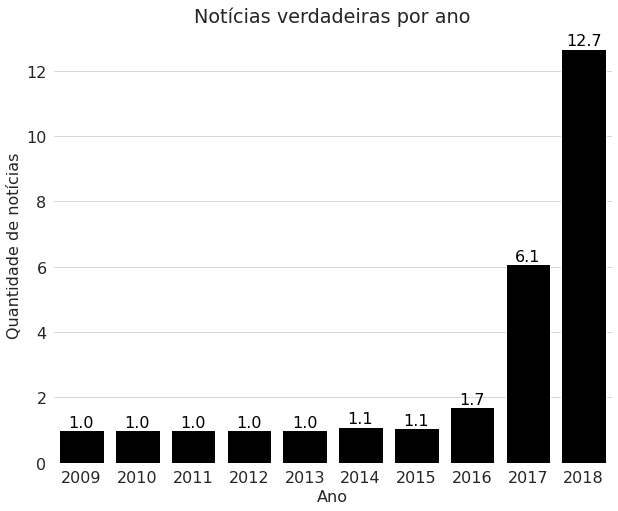

In [31]:
plt.subplots(figsize=(10, 8))
mlp.rc('font', family = 'Arial', size=16)
ax = sns.barplot(x="ano", y="count_label", data=df_true_label_y,
                hue_order="mes", color='black')
ax.set(frame_on=False)
ax.bar_label(
    ax.containers[0],
    fmt='%.1f',
    label_type='edge',
    color='black'
)
plt.title("Notícias verdadeiras por ano")
plt.ylabel('Quantidade de notícias')
plt.xlabel('Ano')
plt.show()

In [32]:
# categoria com maior taxa de fake news
group_category_true = true.groupby('category').count().reset_index()
group_category_fake = fake.groupby('category').count().reset_index()


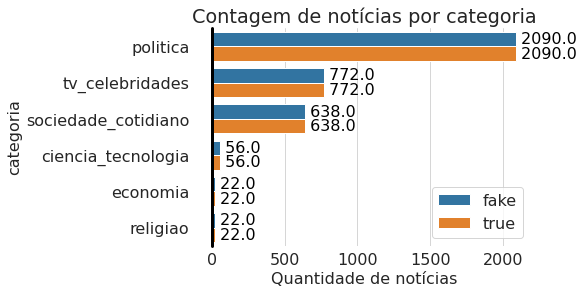

In [33]:
#plt.subplots(figsize=(10, 10))

ax = sns.countplot(data=data, y="category", hue='label')
ax.bar_label(
    ax.containers[0],
    fmt=' %.1f',
    label_type='edge',
    color='black'
)
ax.bar_label(
    ax.containers[1],
    fmt=' %.1f',
    label_type='edge',
    color='black'
)
ax.set(frame_on=False)
ax.axvline(-1, color="k",linewidth = 3, clip_on=False)
plt.legend(title='')
plt.title("Contagem de notícias por categoria")
plt.xlabel('Quantidade de notícias')
plt.ylabel('categoria')
plt.show()

In [34]:
true

,text,datetime,category,label,site,date,date_new,clean_text
3600,﻿O Podemos decidiu expulsar o deputado federa...,13/12/2017,politica,true,http://politica.estadao.com.br/blogs/coluna-do...,13/12/2017,2017-12-13,podemos decidiu expulsar deputado federal carl...
3601,"Bolsonaro é um liberal completo, diz president...",12/1/2018,politica,true,http://www1.folha.uol.com.br/poder/2018/01/194...,12/1/2018,2018-12-01,bolsonaro liberal completo diz presidente psl ...
3602,Ministro do STF libera Andrea Neves de prisão ...,7/12/2017,politica,true,https://g1.globo.com/mg/minas-gerais/noticia/s...,7/12/2017,2017-07-12,ministro stf libera andrea neves prisão domici...
3603,"Apesar da abundância, cresce preocupação com p...",31/10/2017 10h17,politica,true,https://g1.globo.com/mato-grosso-do-sul/notici...,31/10/2017 10h17,2017-10-31,apesar abundância cresce preocupação preservaç...
3604,"Por que Harvard e MIT levarão Dilma, Moro e Su...",05/04/2017 09h08,politica,true,https://g1.globo.com/educacao/noticia/por-que-...,05/04/2017 09h08,2017-05-04,harvard mit levarão dilma moro suplicy eua meg...
...,...,...,...,...,...,...,...,...
7195,"Para jornal britânico, ação contra Lula na Lav...",22 de novembro de 2016,politica,true,"http://politica.estadao.com.br/noticias/geral,...",22/11/2016,2016-11-22,jornal britânico ação contra lula lava jato ju...
7196,Temer diz que acionou PF e Cade para investiga...,09/02/2018 08h25,politica,true,https://g1.globo.com/politica/noticia/temer-di...,09/02/2018 08h25,2018-09-02,temer diz acionou pf cade investigar aumentos ...
7197,Os obstáculos políticos de Temer em 2017. Espe...,31/12/2016 05h00,politica,true,https://g1.globo.com/politica/noticia/os-obsta...,31/12/2016 05h00,2016-12-31,obstáculos políticos temer 2017 especialistas ...
7198,"Sexta-feira, 15 de setembro de 2017. Boa noite...",15/09/2017 20h46,sociedade_cotidiano,true,https://g1.globo.com/resumo-do-dia/noticia/sex...,15/09/2017 20h46,2017-09-15,sextafeira 15 setembro 2017 boa noite aqui pri...


In [35]:
true["tam_noticia"] = [len(i) for i in true.loc[:]["text"].values]
fake["tam_noticia"] = [len(i) for i in fake.loc[:]["text"].values]

/tmp/ipykernel_11496/3516691727.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  true["tam_noticia"] = [len(i) for i in true.loc[:]["text"].values]
/tmp/ipykernel_11496/3516691727.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake["tam_noticia"] = [len(i) for i in fake.loc[:]["text"].values]


In [36]:
true.describe()

,tam_noticia
count,3600.000000
mean,6673.683333
std,4133.504781
min,114.000000
25%,3872.250000
50%,5581.000000
75%,8592.000000
max,46084.000000


In [37]:
fake.describe()

,tam_noticia
count,3600.000000
mean,1124.129167
std,769.451477
min,46.000000
25%,696.000000
50%,956.000000
75%,1356.000000
max,13280.000000


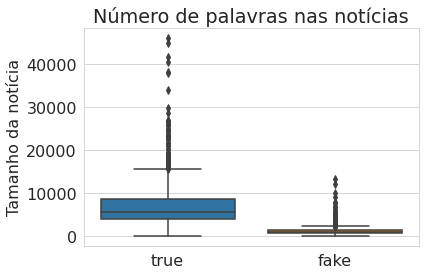

In [38]:
# média de palavras por tipo de noticias
sns.boxplot(data=pd.concat([true,fake]), x="label", y="tam_noticia")
plt.ylabel('Tamanho da notícia')
plt.xlabel('')
plt.title('Número de palavras nas notícias')
plt.show();

abaixo faremos um contador de palavras

In [39]:
fake.head(1)

,text,datetime,category,label,site,date,date_new,clean_text,tam_noticia
0,Kátia Abreu diz que vai colocar sua expulsão e...,2017-11-30,politica,fake,https://ceticismopolitico.com/2017/11/30/katia...,2017/11/30,2017-11-30,kátia abreu diz vai colocar expulsão moldura r...,1035


In [40]:
# palavras usadas com mais frequência nas fake ou true news
word2count_fake = {}
for data in fake.clean_text:
    words = nltk.word_tokenize(data)
    for word in words:
        if word not in word2count_fake.keys():
            word2count_fake[word] = 1
        else:
            word2count_fake[word] += 1

word2count_true = {}
for data in true.clean_text:
    words = nltk.word_tokenize(data)
    for word in words:
        if word not in word2count_true.keys():
            word2count_true[word] = 1
        else:
            word2count_true[word] += 1

In [41]:
import heapq
freq_words_fake = heapq.nlargest(10, word2count_fake, key=word2count_fake.get)
freq_words_true = heapq.nlargest(10, word2count_true, key=word2count_true.get)

In [42]:
num_f = []
num_t = []

In [43]:
for i in freq_words_fake:
    num_f.append(word2count_fake.get(i))

for i in freq_words_true:
    num_t.append(word2count_true.get(i))

In [44]:
d = {
    "nome": freq_words_fake,
    "frequencia":num_f
}

d_true = {
    "nome": freq_words_true,
    "frequencia":num_t
}

In [45]:
best_10_fake = pd.DataFrame(data=d)
best_10_true = pd.DataFrame(data=d_true)

In [46]:
best_10_fake

,nome,frequencia
0,lula,3055
1,disse,2200
2,dilma,1863
3,presidente,1844
4,brasil,1413
5,país,1234
6,governo,1195
7,temer,1183
8,federal,1177
9,sobre,1130


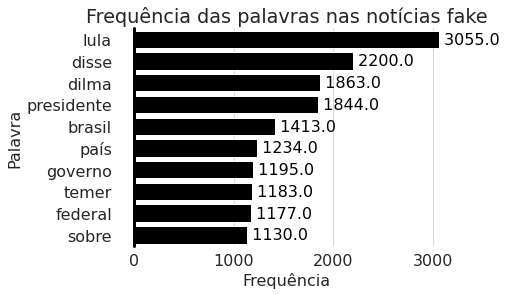

In [47]:
ax = sns.barplot(data=best_10_fake, x='frequencia', y='nome', color='black');
ax.bar_label(
    ax.containers[0],
    fmt=' %.1f',
    label_type='edge',
    color='black'
)
ax.set(frame_on=False)
ax.axvline(-1, color="k",linewidth = 3, clip_on=False)
plt.ylabel('Palavra')
plt.xlabel('Frequência')
plt.title('Frequência das palavras nas notícias fake')
plt.show();

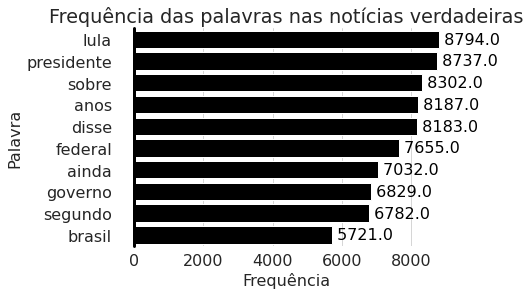

In [48]:
ax = sns.barplot(data=best_10_true, x='frequencia', y='nome', color='black');
ax.bar_label(
    ax.containers[0],
    fmt=' %.1f',
    label_type='edge',
    color='black'
)
ax.set(frame_on=False)
ax.axvline(-1, color="k",linewidth = 3, clip_on=False)
plt.ylabel('Palavra')
plt.xlabel('Frequência')
plt.title('Frequência das palavras nas notícias verdadeiras')
plt.show();

In [49]:
from wordcloud import WordCloud

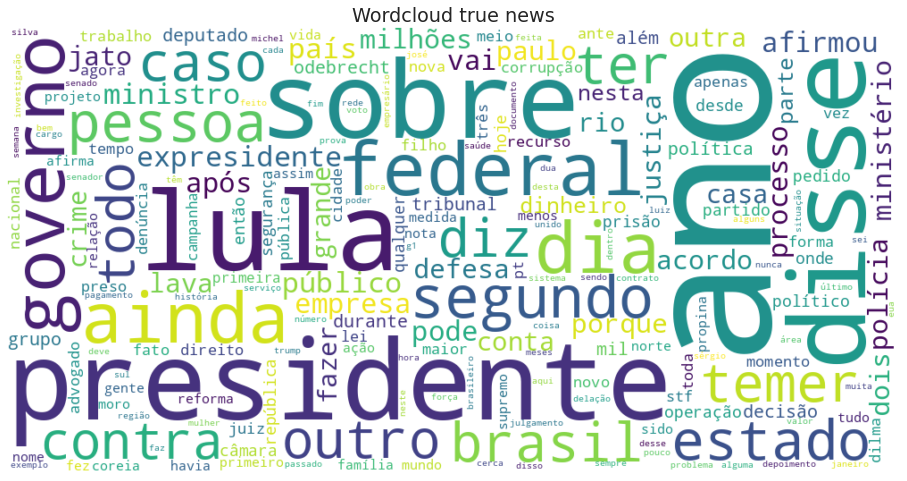

In [50]:
# formação de nuvem de palavras para as true news
text = " ".join(frase for frase in true.clean_text)
wordcloud = WordCloud(stopwords = stopwords,
                          collocations=False,
                          width=1000, height=500,
                          max_font_size=200, 
                          background_color='white').generate(text)

fig, ax = plt.subplots(figsize=(16,12))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.title("Wordcloud true news")
plt.show()  

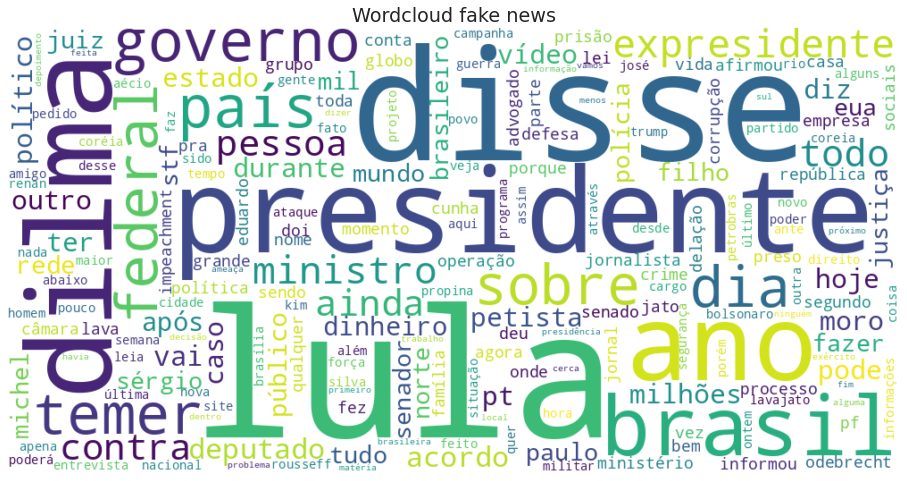

In [51]:
# formação de nuvem de palavras para as fake news
text = " ".join(frase for frase in fake.clean_text)
wordcloud = WordCloud(stopwords = stopwords,
                          collocations=False,
                          width=1000, height=500,
                          max_font_size=200, 
                          background_color='white').generate(text)

fig, ax = plt.subplots(figsize=(16,12))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.title("Wordcloud fake news")
plt.show()

## NGrams

In [52]:
def extract_ngrams(data, num):
    n_grams = ngrams(nltk.word_tokenize(data), num)
    return [ ' '.join(grams) for grams in n_grams]

In [53]:
df = pd.read_csv("../data/external/data_prep1.csv")

In [54]:
df

,text,datetime,category,label,site,date,date_new,clean_text
0,Kátia Abreu diz que vai colocar sua expulsão e...,2017-11-30,politica,fake,https://ceticismopolitico.com/2017/11/30/katia...,2017/11/30,2017-11-30,kátia abreu diz vai colocar expulsão moldura r...
1,"Dr. Ray peita Bolsonaro, chama-o de conservad...",2017-11-24,politica,fake,https://ceticismopolitico.com/2017/11/24/dr-ra...,2017/11/24,2017-11-24,dr ray peita bolsonaro chamao conservador fake...
2,Reinaldo Azevedo desmascarado pela Polícia Fed...,2017-05-23,politica,fake,https://afolhabrasil.com.br/politica/reinaldo-...,2017/05/23,2017-05-23,reinaldo azevedo desmascarado polícia federal ...
3,Relatório assustador do BNDES mostra dinheiro ...,24/07/2017,politica,fake,https://www.diariodobrasil.org/relatorio-assus...,24/07/2017,2017-07-24,relatório assustador bndes mostra dinheiro púb...
4,"Radialista americano fala sobre o PT: ""Eles ve...",25/07/2017,politica,fake,https://www.diariodobrasil.org/radialista-amer...,25/07/2017,2017-07-25,radialista americano fala sobre pt vendem ilus...
...,...,...,...,...,...,...,...,...
7195,"Para jornal britânico, ação contra Lula na Lav...",22 de novembro de 2016,politica,true,"http://politica.estadao.com.br/noticias/geral,...",22/11/2016,2016-11-22,jornal britânico ação contra lula lava jato ju...
7196,Temer diz que acionou PF e Cade para investiga...,09/02/2018 08h25,politica,true,https://g1.globo.com/politica/noticia/temer-di...,09/02/2018 08h25,2018-09-02,temer diz acionou pf cade investigar aumentos ...
7197,Os obstáculos políticos de Temer em 2017. Espe...,31/12/2016 05h00,politica,true,https://g1.globo.com/politica/noticia/os-obsta...,31/12/2016 05h00,2016-12-31,obstáculos políticos temer 2017 especialistas ...
7198,"Sexta-feira, 15 de setembro de 2017. Boa noite...",15/09/2017 20h46,sociedade_cotidiano,true,https://g1.globo.com/resumo-do-dia/noticia/sex...,15/09/2017 20h46,2017-09-15,sextafeira 15 setembro 2017 boa noite aqui pri...


In [55]:
df_bi_gram = pd.DataFrame()

In [56]:
df_bi_gram["text"] = df.clean_text

Erro no download das partes do nltk

In [61]:
# a = df_bi_gram["text"].apply(lambda x : ngrams(nltk.word_tokenize(x,2)))

In [58]:
# N_GRAMS = extract_ngrams(df_bi_gram["text"],2)

In [59]:
# df_bi_gram["ngrams"]= extract_ngrams(df_bi_gram["text"],2)

## Descrição dos dados

O conjunto de dados possui 7200 instâncias e 4 colunas.
As colunas são as variáveis:
- **text**: referente ao texto da notícia, do tipo nominal;
- **datetime**: data da publicação das matérias, do tipo ordinal;
- **category**: assunto/tema da notícia trata, do tipo nominal;
- **label**: rótulo da notícia, se ela é falsa (fake) ou verdadeira (true), do tipo nominal;

Não há dados faltantes no dataframe.

## Perguntas de partida e hipóteses

Existe uma relação entre as fake news e a data?

Houve um período com mais fake news? Por que ele diminuiu ou aumentou?

Qual categoria apresenta maior quantidade de fake news?

Como se comparam as notícias em relação ao tamanho?

Quais são as palavras mais frequentes?

## Insights

Mensalmente podemos dizer que a taxa de fake news mais alta se encontra no mês 1 (Janeiro), já a maior taxa de true news se encontra no mês 3 (março). Anualmente, a maior taxa foi contabilizada em 2016, ano de eleição nos EUA, e em 2017, ano de eleição no Brasil. 
Em 2018, no entanto, tivemos uma queda significativa provavelmente devido a descoberta do significado de fake news e como consequencia, diversos portais alertaram a população sobre como identificar fake news, além de diversos sites que fazem isso automaticamente apenas com link da notícia ou com a manchete.

A categoria com maior quantidade de fake news é a de **política**. A pequena diferença mostrada deve-se ao tratamento realizado no início da análise exploratória.

As médias de tamanho são 6676 e 1124 para true news e para fake news, respectivamente.
Já a mediana de 5584 para true news e de fake news é 696. Ou seja, uma notícia verdadeira é bem mais longa do que uma falsa, o que pode ser uma característica marcante para a distinção entre elas.

De acordo com a contagem e a nuvem de palavras, tanto nas fake quanto nas verdadeiras, a palavra campeã, a que mais aparece é o nome do ex-presidente Lula. Comparando as duas nuvens, podemos pensar que nesta sessão, o nome pode ter sido usado para "limpar" a fake news criada.
Outro ponto de discussão é que, nas notícias verdadeiras temos várias palavras como "ano, sobre, dia, outro". Seria aconselhável fazer um novo tratamento de dados retirando esses termos ou testar outras técnicas, como contagem com bigramas.